## Выпускной проект: "Формирование модели монетизации"

### Задача

Сформировать модель монетизации игрового приложения.



1. Исследовательский анализ данных

2. Анализ влияния событий на совершение целевого события(получение первого уровня)

3. Проверка статистических гипотез


Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне.

Ссылка на презентацию https://docs.google.com/presentation/d/1D9_0i8MdR6m84RqqxL7KttklhwIdne4lfEyERDXCzrY/edit?usp=sharing

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
import math as mth
from pandas.plotting import register_matplotlib_converters
from plotly import graph_objects as go
import datetime as dt 
import plotly.express as px
from datetime import timedelta
 

<a id='1'></a>
### 1. Предобработка

In [2]:
events = pd.read_csv('/datasets/game_actions.csv')

In [3]:
events.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


In [5]:
len(events['user_id'].unique())

13576

In [6]:
user_source = pd.read_csv('/datasets/user_source.csv')

In [7]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [8]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


In [9]:
len(user_source['user_id'].unique())

13576

In [10]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')

In [11]:
ad_costs.head()
ad_costs['day'] = pd.to_datetime(ad_costs['day'], format='%Y-%m-%d')

In [12]:
events['event_datetime'] = pd.to_datetime(events['event_datetime'], format ='%Y-%m-%d %H:%M:%S')

In [13]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null datetime64[ns]
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


In [14]:
events['date'] = events['event_datetime'].dt.date
events['week'] = events['date'].astype('datetime64[W]')

In [15]:
events['date'].unique()

array([datetime.date(2020, 5, 4), datetime.date(2020, 5, 5),
       datetime.date(2020, 5, 6), datetime.date(2020, 5, 7),
       datetime.date(2020, 5, 8), datetime.date(2020, 5, 9),
       datetime.date(2020, 5, 10), datetime.date(2020, 5, 11),
       datetime.date(2020, 5, 12), datetime.date(2020, 5, 13),
       datetime.date(2020, 5, 14), datetime.date(2020, 5, 15),
       datetime.date(2020, 5, 16), datetime.date(2020, 5, 17),
       datetime.date(2020, 5, 18), datetime.date(2020, 5, 19),
       datetime.date(2020, 5, 20), datetime.date(2020, 5, 21),
       datetime.date(2020, 5, 22), datetime.date(2020, 5, 23),
       datetime.date(2020, 5, 24), datetime.date(2020, 5, 25),
       datetime.date(2020, 5, 26), datetime.date(2020, 5, 27),
       datetime.date(2020, 5, 28), datetime.date(2020, 5, 29),
       datetime.date(2020, 5, 30), datetime.date(2020, 5, 31),
       datetime.date(2020, 6, 1), datetime.date(2020, 6, 2),
       datetime.date(2020, 6, 3), datetime.date(2020, 6, 4),
  

в выделенных данных есть события за даты с 5,04,20 по 5,06,20


### 2. Первичный анализ
<a id='2'></a>

In [16]:
events_h = events.groupby('date').agg({'user_id' : 'nunique'}).reset_index()
events_h.head(10)

,date,user_id
0,2020-05-04,5860
1,2020-05-05,6382
2,2020-05-06,6854
3,2020-05-07,7384
4,2020-05-08,7891
5,2020-05-09,8394
6,2020-05-10,9219
7,2020-05-11,5995
8,2020-05-12,5776
9,2020-05-13,5632


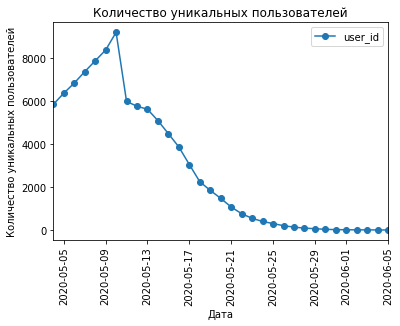

In [17]:
events_h.plot(x ='date',y = 'user_id', style = 'o-')
plt.title('Количество уникальных пользователей')
plt.xlabel("Дата")
plt.ylabel("Количество уникальных пользователей")
plt.xticks(rotation=90)
plt.show()

По графику видно, что очень мало пользователей, зарегистрировавшихся в игре с 4 по 10 мая все еще продолжают играть. Так же видно пик уникальных пользователей в игре 2020-05-10 - последний день, когда учитываются новые пользователи. 

In [18]:
first_visit_date = events.groupby('user_id')['date'].min()
first_visit_date.name = 'first_visit_date'

last_visit_date = events.groupby('user_id')['date'].max()
last_visit_date.name = 'last_visit_date'
last_visit_date.head()

user_id
0001f83c-c6ac-4621-b7f0-8a28b283ac30    2020-05-20
00151b4f-ba38-44a8-a650-d7cf130a0105    2020-05-18
001aaea6-3d14-43f1-8ca8-7f48820f17aa    2020-05-14
001d39dc-366c-4021-9604-6a3b9ff01e25    2020-05-12
002f508f-67b6-479f-814b-b05f00d4e995    2020-05-22
Name: last_visit_date, dtype: object

In [19]:
events = events.join(first_visit_date, on = 'user_id')
events = events.join(last_visit_date, on = 'user_id')

In [20]:
events['lifetime'] = (events['date'] - events['first_visit_date'])/np.timedelta64(1, 'W')
events['lifetime'] = events['lifetime'].round().astype('int')
events['total_in_game'] = (events['last_visit_date'] - events['first_visit_date'])/np.timedelta64(1, 'D')

events.head()

,event_datetime,event,building_type,user_id,project_type,date,week,first_visit_date,last_visit_date,lifetime,total_in_game
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-10,0,6.0
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-15,0,11.0
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-16,0,12.0
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-12,0,8.0
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-11,0,7.0


In [21]:
events['total_in_game'].describe()

count    135640.000000
mean         11.689760
std           4.068289
min           0.000000
25%           9.000000
50%          11.000000
75%          14.000000
max          31.000000
Name: total_in_game, dtype: float64

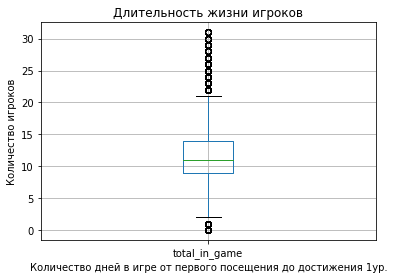

In [22]:
plt.title('Длительность жизни игроков')
events.boxplot('total_in_game')
plt.xlabel("Количество дней в игре от первого посещения до достижения 1ур.")
plt.ylabel("Количество игроков")
plt.show()

Большинство пользователей проводят в игре до 14 дней.

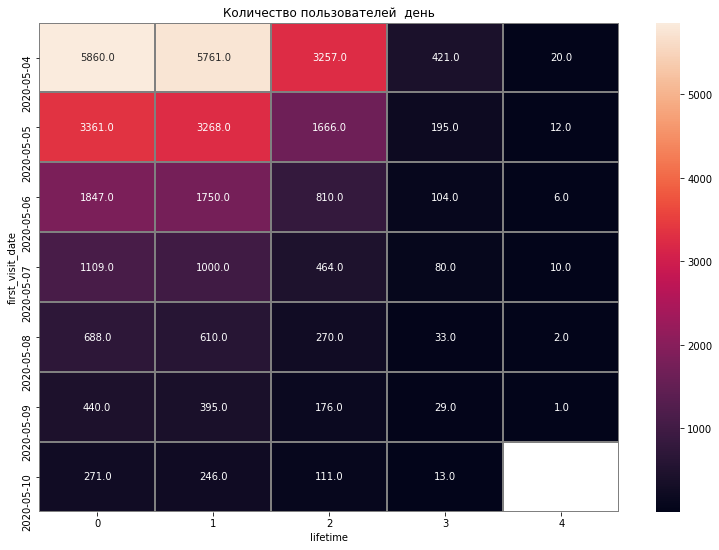

In [23]:
plt.figure(figsize=(13, 9))
plt.title('Количество пользователей  день')
sns.heatmap(events.pivot_table(index = 'first_visit_date', columns = 'lifetime', values = 'user_id', aggfunc = 'nunique'), annot=True, fmt='.1f', linewidths=1, linecolor='gray') 


In [24]:
finish_st_1= events.query('event == "finished_stage_1"')
first_level_complited = finish_st_1['user_id'].unique()

finish_st_1['lifetime'].describe()
finish_st_1.head()

,event_datetime,event,building_type,user_id,project_type,date,week,first_visit_date,last_visit_date,lifetime,total_in_game
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-04,0,0.0
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,2020-05-05,2020-04-30,2020-05-04,2020-05-05,0,1.0
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,2020-05-05,2020-04-30,2020-05-04,2020-05-05,0,1.0
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,2020-05-05,2020-04-30,2020-05-04,2020-05-05,0,1.0
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,2020-05-06,2020-04-30,2020-05-04,2020-05-06,0,2.0


In [25]:
def level_complite(data):
    if data in first_level_complited:
        return 1
    else:
        return 0
events['complite'] = 0
events['complite'] = events['user_id'].apply(level_complite)

#### 2.1 Корреляции признаков
<a id='3'></a>

In [26]:
matr = events.groupby('user_id').agg({'event':'count', 'complite': 'max', 'lifetime': 'max', 'total_in_game': 'max'})

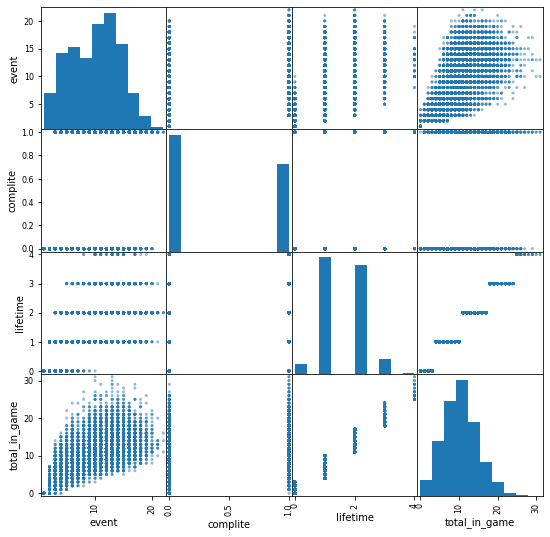

In [27]:
pd.plotting.scatter_matrix(matr, figsize=(9, 9))
plt.show()

In [28]:
matr.corr()

,event,complite,lifetime,total_in_game
event,1.000000,0.371600,0.521837,0.585757
complite,0.371600,1.000000,0.208534,0.234041
lifetime,0.521837,0.208534,1.000000,0.908712
total_in_game,0.585757,0.234041,0.908712,1.000000


Сильной корреляции между окончание уровня и другими собятиями не выявлено. Наибольшая корреляция с показателем lifetime составляет всего 0,21, с количеством событий на пользователя - 0,37

In [29]:
finish_st_1 = finish_st_1[['event_datetime', 'user_id']]

In [30]:
finish_st_1.columns = ['1st_datetime', 'user_id']
events = pd.merge(events, finish_st_1, how = 'left', on = 'user_id')

In [31]:
project_finisher = events.query('project_type == "satellite_orbital_assembly"')
project_finisher['form_pr_to_1st'] = (project_finisher['1st_datetime'].dt.date -project_finisher['event_datetime'].dt.date) /  np.timedelta64(1, 'D')
project_finisher['form_pr_to_1st'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    1866.000000
mean        1.567524
std         2.004284
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: form_pr_to_1st, dtype: float64

Существует промежуток времени между постройкой космопорта и получением первого уровня. Для половины пользователей это время не превышает одного дня. А для некоторых пользователей период повышения уровня составил 13 дней. Уровень повышается только со следующим визитом в игру? 

Всего 1866 пользователей закончили первый уровень постройкой космопорта из 5817пользователей получивших первый уровень. Отсюда следует вывод, что большая часть пользователей предпочитает повышать уровень победой над другим игроком.


In [32]:
events['1level_long'] = (events['1st_datetime'].dt.date - events['first_visit_date']) /  np.timedelta64(1, 'D')

In [33]:
events['1level_long'].describe()

count    68469.000000
mean        12.347997
std          3.877719
min          0.000000
25%         10.000000
50%         12.000000
75%         15.000000
max         31.000000
Name: 1level_long, dtype: float64

Большинство пользователей получают первый уровень на 1-2 неделе жизни. Этот период соответствует наибольшему посещению игры (наибольшее количество пользователей в игре в недели lifetime 0 и 1)

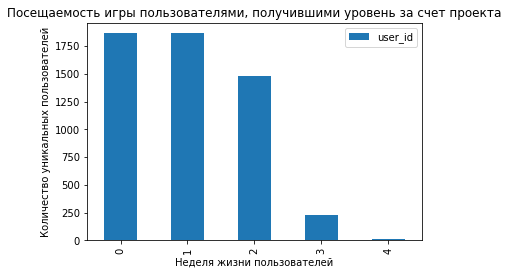

In [34]:
project_finisher_user = project_finisher['user_id'].unique()
progect_finisher_per_day = events.query('user_id in @project_finisher_user').groupby('lifetime').agg({'user_id':'nunique'}).reset_index()


progect_finisher_per_day.plot(y =['user_id'], kind = 'bar')
plt.title('Посещаемость игры пользователями, получившими уровень за счет проекта')
plt.xlabel("Неделя жизни пользователей")
plt.ylabel("Количество уникальных пользователей")
plt.show()

Получается, что пользователи, получившие 1 уровень завершением проекта посещают игру активно в 0 и 1 неделю lifetime. Резкий спад идет на 3 неделю игры

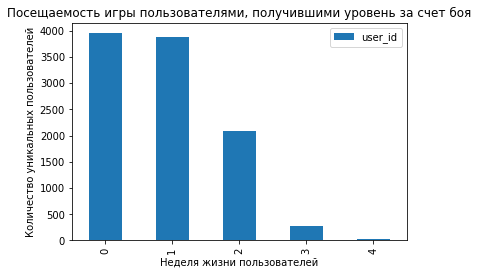

In [35]:
fighters_per_day = events.query('user_id in @first_level_complited and user_id not in @project_finisher_user').groupby('lifetime').agg({'user_id':'nunique'}).reset_index()
fighters_per_day
fighters_per_day.plot(y =['user_id'], kind = 'bar')
plt.title('Посещаемость игры пользователями, получившими уровень за счет боя')
plt.xlabel("Неделя жизни пользователей")
plt.ylabel("Количество уникальных пользователей")
plt.show()

Пользователей получившие 1 уровень победой над другим персонажем в игре больше и уникальных пользователей в день так же заходит больше. Но тренд такой же - после первых двух недель игроки уходят.

In [36]:
for name in ['assembly_shop', 'spaceport', 'research_center']:
    events[name] = 0
    events.loc[events['building_type'] == name, name] = events.loc[events['building_type'] == name, name].replace(0,1)

events.query('building_type == "spaceport"').head()


,event_datetime,event,building_type,user_id,project_type,date,week,first_visit_date,last_visit_date,lifetime,total_in_game,complite,1st_datetime,1level_long,assembly_shop,spaceport,research_center
397,2020-05-04 01:14:40,building,spaceport,cd74d4ab-4f44-418d-9f9b-7db1b2d9a794,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-04,0,0.0,0,NaT,NaN,0,1,0
670,2020-05-04 02:03:16,building,spaceport,cbec1209-cd6d-4e94-b361-a40c0ddf532f,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-13,0,9.0,1,2020-05-13 22:26:56,9.0,0,1,0
722,2020-05-04 02:13:39,building,spaceport,a2d93bea-4d45-4091-8087-ea9a40bc0946,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-17,0,13.0,1,2020-05-17 13:57:58,13.0,0,1,0
845,2020-05-04 02:38:50,building,spaceport,f25eb405-33b3-45b6-958c-2959ba59364d,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-12,0,8.0,0,NaT,NaN,0,1,0
916,2020-05-04 02:53:07,building,spaceport,f7b2f74f-621f-41ab-821d-76fab1d68031,NaN,2020-05-04,2020-04-30,2020-05-04,2020-05-16,0,12.0,1,2020-05-16 15:44:58,12.0,0,1,0


In [37]:
builders_events = events.query('user_id in @project_finisher_user') # пользователи, завершившие первый уровень постройкой проекта
fighters_events = events.query('user_id in @first_level_complited and user_id not in @project_finisher_user') # пользоватлеи, завершившие первый уровень сражением

Для всех игроков


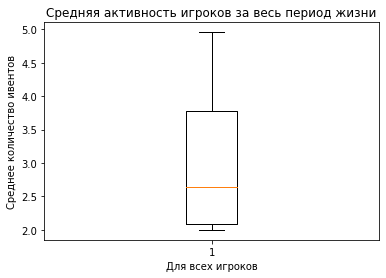

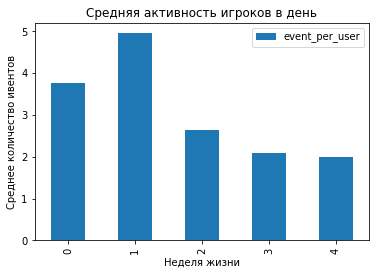

Для строителей


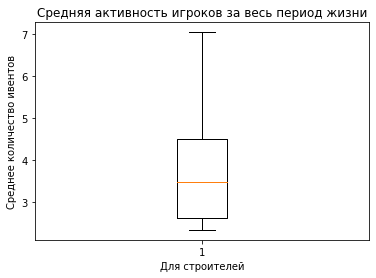

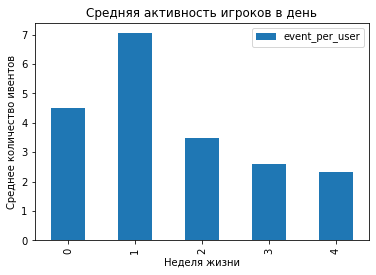

Для бойцов


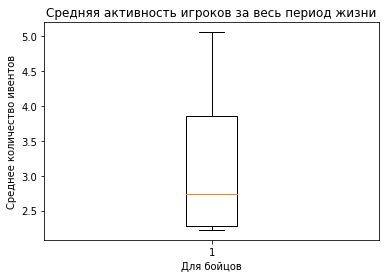

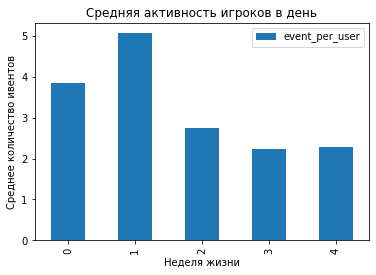

In [38]:
for data, name in [[events, "Для всех игроков"], [builders_events, "Для строителей"], [fighters_events, "Для бойцов"]]:
    data_grouped = data.groupby('lifetime').agg({'user_id': 'nunique', 'event':'count'}).reset_index()
    data_grouped['event_per_user'] = data_grouped['event']/data_grouped['user_id']
    plt.boxplot(data_grouped['event_per_user'])
    plt.title('Средняя активность игроков за весь период жизни')
    plt.xlabel(name)
    plt.ylabel("Среднее количество ивентов")
    data_grouped.plot(y =['event_per_user'], kind = 'bar')
    print(name)
    plt.title('Средняя активность игроков в день')
    plt.xlabel("Неделя жизни")
    plt.ylabel("Среднее количество ивентов")
    plt.show()
    
    

Количество пользователей убывает с 3ей недели жизни каждой когорты. А вот активность на пользователя не так однозначна. И на 4ой неделе виден рост активности  у бойцов. 

### 3. Проверка гипотез
<a id='4'></a>

In [39]:
builder_1stlevel =builders_events.groupby('user_id').agg({'1level_long': 'max'})
fighter_1stlevel =fighters_events.groupby('user_id').agg({'1level_long': 'max'})

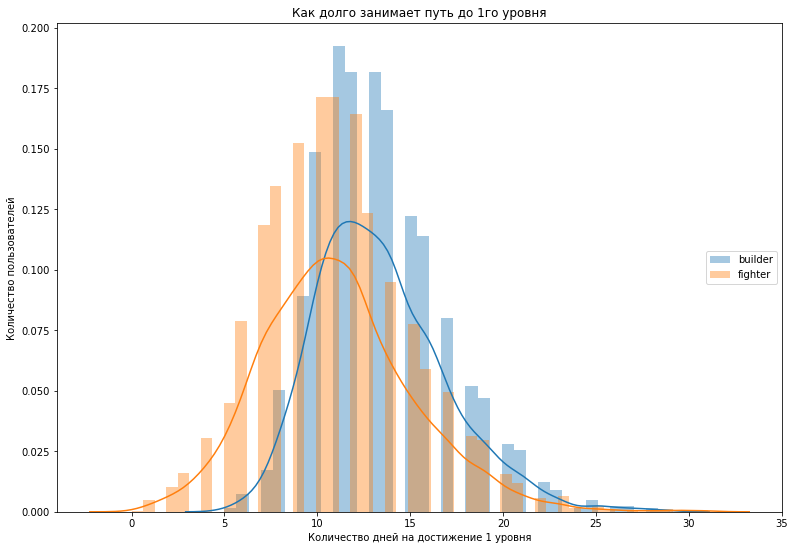

In [40]:
plt.figure(figsize=(13, 9))
plt.title('Как долго занимает путь до 1го уровня')
sns.distplot(builder_1stlevel['1level_long'], label = 'builder')
sns.distplot(fighter_1stlevel['1level_long'], label = 'fighter')
plt.xlabel("Количество дней на достижение 1 уровня")
plt.ylabel("Количество пользователей")
plt.legend(loc = 7)

plt.show()

In [41]:
print(builder_1stlevel.mean())
print(fighter_1stlevel.mean())

1level_long    13.39657
dtype: float64
1level_long    11.058466
dtype: float64


По графику кажется, что бойцы быстрее проходят первый уровень, чем строители.

#### 1 Гипотеза: Среднее время прохождения 1 уровня одинаково для обеих групп (бойцы и строители (Н0).
Альтернативная: Среднее время прохождения 1 уровня у группы бойцов меньше, чем у группы строителей (Н1).

In [42]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    builder_1stlevel, 
    fighter_1stlevel)

print('p-значение:', results.pvalue)

if (results.pvalue / 2 < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: [4.36337001e-96]
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Альтернативная гипотеза верна - бойцы преодолевают порог 1го уровня быстрее. Среднее время бойцов - 11 дней, строителей - 13,4 дня 

In [43]:
builder_activity = builders_events.groupby('date').agg({'user_id': 'nunique', 'event':'count'}).reset_index()
builder_activity['event_per_user'] = builder_activity['event']/builder_activity['user_id']
activity_build = builder_activity[['event_per_user']]
len(activity_build)
activity_build.mean()

event_per_user    1.442386
dtype: float64

In [44]:
fighter_activity = fighters_events.groupby('date').agg({'user_id': 'nunique', 'event':'count'}).reset_index()
fighter_activity['event_per_user'] = fighter_activity['event']/fighter_activity['user_id']
fighter_activity = fighter_activity[['event_per_user']]
fighter_activity = fighter_activity.loc[:31] # бойцы были активны на один день больше, чем строители, поэтому сравниваем сеты по длине
len(fighter_activity)
fighter_activity.mean()

event_per_user    1.345382
dtype: float64

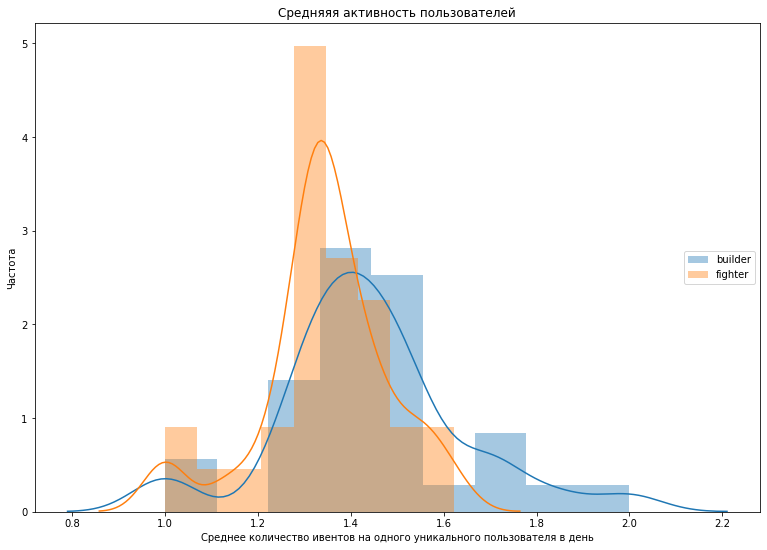

In [45]:
plt.figure(figsize=(13, 9))
plt.title('Средняяя активность пользователей')
sns.distplot(activity_build, label = 'builder')
sns.distplot(fighter_activity, label = 'fighter')
plt.xlabel("Среднее количество ивентов на одного уникального пользователя в день")
plt.ylabel("Частота")
plt.legend(loc = 7)
#fighter_1stlevel.hist()
plt.show()

#### 2 Гипотеза: Строители и бойцы совершают одинаковое среднее количество активностей в день (бойцы и строители (Н0).
Альтернативная: Строители в среднем активнее бойцов (Н1).

In [46]:
results = st.ttest_ind(
    activity_build, 
    fighter_activity)

print('p-значение:', results.pvalue)

if (results.pvalue / 2 < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: [0.0293681]
Отвергаем нулевую гипотезу


Строители в среднем более активны, чем бойцы. 

### 4.Исследования строительной активности (место размещение рекламы)
<a id='5'></a>

In [47]:
buildings_for_builders =builders_events.groupby('building_type').agg({'user_id' : 'nunique', 'assembly_shop': 'sum', 'spaceport': 'sum', 'research_center' : 'sum'})
buildings_for_builders['per_user'] = (buildings_for_builders['assembly_shop'] + buildings_for_builders['spaceport'] + buildings_for_builders['research_center'])/ buildings_for_builders['user_id']
buildings_for_builders

,user_id,assembly_shop,spaceport,research_center,per_user
building_type,,,,,
assembly_shop,1866,9116,0,0,4.885316
research_center,1866,0,0,3697,1.981243
spaceport,1866,0,10788,0,5.781350


In [48]:
buildings_for_fighters = fighters_events.groupby('building_type').agg({'user_id' : 'nunique', 'assembly_shop': 'sum', 'spaceport': 'sum', 'research_center' : 'sum'})
buildings_for_fighters['per_user'] = (buildings_for_fighters['assembly_shop'] + buildings_for_fighters['spaceport'] + buildings_for_fighters['research_center'])/ buildings_for_fighters['user_id']
buildings_for_fighters

,user_id,assembly_shop,spaceport,research_center,per_user
building_type,,,,,
assembly_shop,3951,16298,0,0,4.125032
research_center,2342,0,0,3755,1.603330
spaceport,3894,0,17132,0,4.399589


Среди всех доступных для анализа построек - самая популярная для обних групп spaceport. При этом каждый строитель построил хотя бы по одному зданию каждого вида (наименее популярен - research center), а среди бойцов наибольшее кол-во пользователей строит assembly_shop (в среднем по 4,1 магазину на каждого пользователя). А spaceport строит чуть меньшее количество пользователей, но боьлше по количествоу (4.3 порта на каждого пользователя).  

### 5.Исследование рекламных источников
<a id='6'></a>

In [49]:
for_market = events.groupby('user_id').agg({
    'complite': 'max', 
    'event':'count', 
    'total_in_game': 'max', 
    'first_visit_date':'first'})

In [50]:
for_market = pd.merge(for_market, user_source, how = 'left', on = 'user_id')

In [51]:
def champions(user_id):
    if user_id in project_finisher_user:
        return "builder"
    elif user_id in first_level_complited:
        return "fighters"
    else:
        return "not_int"

In [52]:
for_market['user_class']= for_market['user_id'].agg(champions)

In [53]:
for_market.query('user_class == "not_int"').groupby('source').agg({'total_in_game': 'mean'}) # средний срок жизни пользователей, так и не прошедших 1ый уровень

,total_in_game
source,
facebook_ads,9.860406
instagram_new_adverts,9.885699
yandex_direct,9.688649
youtube_channel_reklama,9.561231


In [54]:
for_market.groupby(['source', 'user_class']).agg({'event':'mean', 'complite':'sum','total_in_game':'median'})

event  complite  total_in_game
source                  user_class                                    
facebook_ads            builder     14.649616       391           13.0
                        fighters    10.429513       759           11.0
                        not_int      8.901015         0           10.0
instagram_new_adverts   builder     14.756303       476           13.0
                        fighters    10.400000       990           11.0
                        not_int      8.738437         0           10.0
yandex_direct           builder     14.595161       620           13.0
                        fighters    10.375527      1422           11.0
                        not_int      8.609369         0            9.0
youtube_channel_reklama builder     14.596306       379           13.0
                        fighters    10.474359       780           11.0
                        not_int      8.392272         0            9.0

In [55]:
market_users = for_market.groupby('source').agg({'event':'mean', 'complite':['sum','count'],'total_in_game':'median'})

In [56]:
market_users.columns = ['events_per_user', 'complite_1_lv', 'total_come', 'median_time_in_game']
market_users['events_per_user'] = market_users['events_per_user'].round()

In [57]:
market_users['%1st_level_finished'] = 100 * market_users['complite_1_lv']/market_users['total_come']
market_users['%1st_level_finished'] = market_users['%1st_level_finished'].round(2)
market_users

,events_per_user,complite_1_lv,total_come,median_time_in_game,%1st_level_finished
source,,,,,
facebook_ads,10.0,1150,2726,11.0,42.19
instagram_new_adverts,10.0,1466,3347,11.0,43.80
yandex_direct,10.0,2042,4817,10.0,42.39
youtube_channel_reklama,10.0,1159,2686,10.0,43.15


In [58]:
ad_costs.groupby('source').agg({'cost' : 'sum'}).sort_values(by='cost', ascending = False)

,cost
source,
yandex_direct,2233.111449
instagram_new_adverts,2161.441691
facebook_ads,2140.904643
youtube_channel_reklama,1068.119204


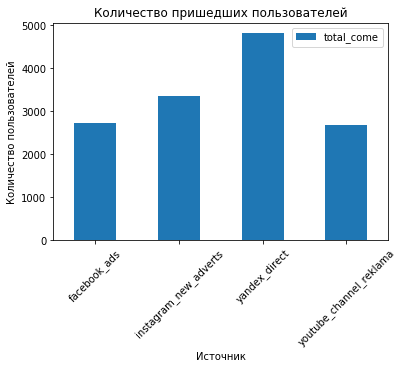

In [59]:
market_users.plot(y='total_come', kind='bar')
plt.title('Количество пришедших пользователей')
plt.xticks(rotation=45)
plt.xlabel("Источник")
plt.ylabel("Количество пользователей")
plt.show()

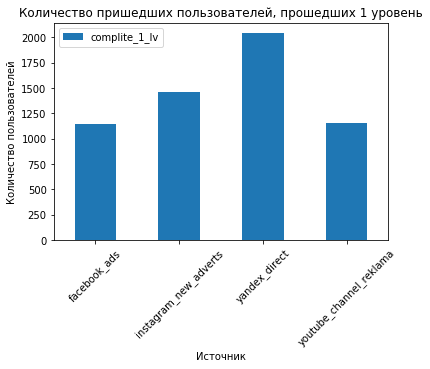

In [60]:
market_users.plot(y='complite_1_lv', kind='bar')
plt.title('Количество пришедших пользователей, прошедших 1 уровень')
plt.xticks(rotation=45)
plt.xlabel("Источник")
plt.ylabel("Количество пользователей")
plt.show()

Больше всего людей пришло с yandex_direct, логично, что так же больше всего прошедших 1ый уровень. А вот процент прохождения 1 уровня примерно равный между источниками (42,2-43,8%) 

In [61]:
money_market = for_market.groupby(['source', 'first_visit_date']).agg({'user_id':'count', 'complite':'sum', 'total_in_game':'median'}).reset_index()
money_market.columns = ['source', 'day', 'user_id', 'complite', 'median_totaltime_in_game']
money_market['day'] = pd.to_datetime(money_market['day'], format='%Y-%m-%d')

In [62]:
money_market = pd.merge(money_market, ad_costs, how = 'left', on = ['source', 'day'])
money_market['cost_per_user'] = money_market['cost'] / money_market['user_id']


In [63]:
money_market.groupby('source').user_id.sum()

source
facebook_ads               2726
instagram_new_adverts      3347
yandex_direct              4817
youtube_channel_reklama    2686
Name: user_id, dtype: int64

In [64]:
money_market.groupby('source').cost.sum()

source
facebook_ads               1205.021857
instagram_new_adverts      1218.236973
yandex_direct              1263.972055
youtube_channel_reklama     613.894261
Name: cost, dtype: float64

In [65]:
money_market = money_market.dropna()
money_market.head()
mm_grouped = money_market.groupby('source').agg({'cost':'sum', 'user_id': 'sum'}) 
mm_grouped.columns = ['total_cost', 'total_users']
mm_grouped['avg_cost_per_user'] = mm_grouped['total_cost'] / mm_grouped['total_users']# средняя стоимость пользователя за весь период
mm_grouped['avg_cost_per_user'] = mm_grouped['avg_cost_per_user'].round(3)
mm_grouped

,total_cost,total_users,avg_cost_per_user
source,,,
facebook_ads,1205.021857,2670,0.451
instagram_new_adverts,1218.236973,3277,0.372
yandex_direct,1263.972055,4728,0.267
youtube_channel_reklama,613.894261,2630,0.233


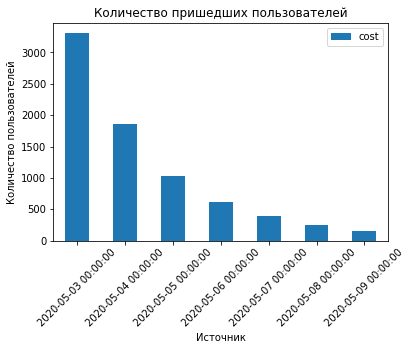

,cost
source,
facebook_ads,2140.904643
instagram_new_adverts,2161.441691
yandex_direct,2233.111449
youtube_channel_reklama,1068.119204


In [66]:
#ad_costs.groupby('source').cost.sum()
ad_costs.groupby('day').agg({'cost':'sum'}).plot(y='cost', kind='bar')
plt.title('Количество пришедших пользователей')
plt.xticks(rotation=45)
plt.xlabel("Источник")
plt.ylabel("Количество пользователей")
plt.show()

ad_costs.groupby('source').agg({'cost':'sum'})

In [67]:
ad_costs['day'].unique()

array(['2020-05-03T00:00:00.000000000', '2020-05-04T00:00:00.000000000',
       '2020-05-05T00:00:00.000000000', '2020-05-06T00:00:00.000000000',
       '2020-05-07T00:00:00.000000000', '2020-05-08T00:00:00.000000000',
       '2020-05-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [68]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null datetime64[ns]
cost      28 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


In [69]:
for_market_new = pd.merge(user_source, first_visit_date, how = 'left', on = 'user_id')
for_market_new_grouped = for_market_new.groupby(['first_visit_date', 'source']).agg({'user_id':'count'}).reset_index()
for_market_new_grouped.columns = ['day', 'source', 'user_count']
for_market_new_grouped['day'] = pd.to_datetime(for_market_new_grouped['day'], format ='%Y-%m-%d')
for_market_new_grouped = pd.merge(for_market_new_grouped, ad_costs, how = 'left', on = ['day', 'source'])

In [70]:
mm_new = for_market_new_grouped.groupby('source').agg({'user_count':'sum', 'cost':'sum'})
mm_new['cost_per_user'] = mm_new['cost'] / mm_new['user_count']
mm_new

,user_count,cost,cost_per_user
source,,,
facebook_ads,2726,1205.021857,0.442048
instagram_new_adverts,3347,1218.236973,0.363979
yandex_direct,4817,1263.972055,0.262398
youtube_channel_reklama,2686,613.894261,0.228553


Затраты, которые хравнятся в файле ad_costs включают 3 число, которого у нас среди пользоватеелй нет, и нет данных за 10 ое число, которое есть для пользователей, но его нет для  затрат.при это нет указзани сдвигать даты, чтобы затраты пользователей на 3 число считались на пользователей пришедших 4го числа. Что вполне логично, но для этого нужно знать, когда производится оплата и с какой скоростью действует реклама (на основании чего сдвигать расчет).

In [71]:
for_market_new['effective_date'] = for_market_new['first_visit_date'] - timedelta(1)

In [72]:
for_market_new = for_market_new.drop(columns= 'first_visit_date')

In [73]:
for_market_new_grouped2 = for_market_new.groupby(['effective_date', 'source']).agg({'user_id':'count'}).reset_index()
for_market_new_grouped2.columns = ['day', 'source', 'user_count']
for_market_new_grouped2['day'] = pd.to_datetime(for_market_new_grouped2['day'], format ='%Y-%m-%d')
for_market_new_grouped2 = pd.merge(for_market_new_grouped2, ad_costs, how = 'left', on = ['day', 'source'])
for_market_new_grouped2

mm_new_witn_timedelta = for_market_new_grouped2.groupby('source').agg({'user_count':'sum', 'cost':'sum'})
mm_new_witn_timedelta['cost_per_user'] = mm_new_witn_timedelta['cost'] / mm_new_witn_timedelta['user_count']
mm_new_witn_timedelta

,user_count,cost,cost_per_user
source,,,
facebook_ads,2726,2140.904643,0.785365
instagram_new_adverts,3347,2161.441691,0.645785
yandex_direct,4817,2233.111449,0.463590
youtube_channel_reklama,2686,1068.119204,0.397662


Если считаем верным условие, что затраты на рекламу приводят к действиям пользователей через сутки, то стоимость каждого пользователя в среднем за весь период времени с 03/05/2020 по 09/05/2020 на основании затрат на рекламу с учетам дельты времени будет выглядеть так: 
- facebook_ads 0,785
- instagram_new_adverts  0,646
- yandex_direct  0,463
- youtube_channel_reklama 0,398 


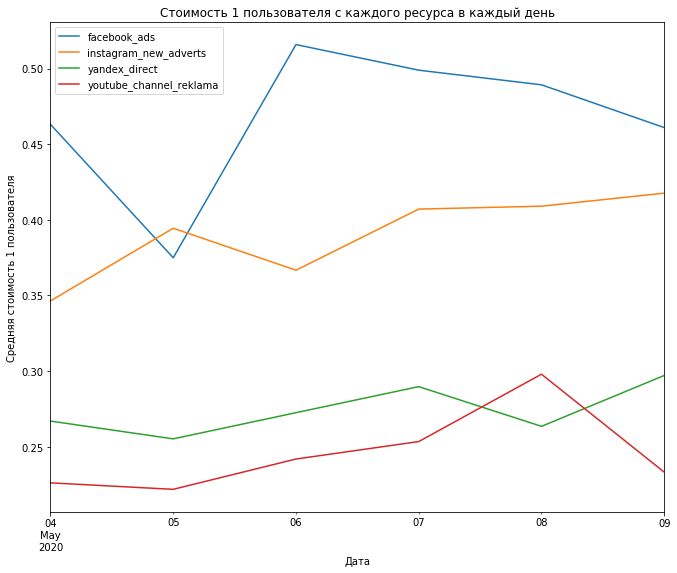

In [74]:

fig, ax = plt.subplots(figsize=(11, 9))

for i, group in money_market.groupby('source'):
    group.plot(x='day', y='cost_per_user', ax=ax, label=group["source"].iloc[0])
ax.set_title("Стоимость 1 пользователя с каждого ресурса в каждый день")
ax.set_ylabel("Средняя стоимость 1 пользователя")
ax.set_xlabel("Дата")

plt.show()


При этом самыми дорогими являются пользователи, пришедшие с facebook_ads на всем протяжении наблюдений. 

### Выводы 
<a id='7'></a>


 Всего в предложенных датасетах рассматривали действия 13576 пользователей игры, зарегистрировавшихся в период с 4 по 10 мая 2020 года, за период  с 04 мая 2020 по 5 июня 2020.  Из этих пользоватлей были сформированы когорты по дням регистрации. Наиболее многочисленны когорты от 4 и 5 мая. 


 Пик активности пользователей в игре приходится на 10 мая (последний день даты регистрации). При этом не ясно образовался ли пик присутствия пользователей в игре в результате края регистрационного периода, или происходила какая-то доп.активность, которая привлекла пользоватлей. 
 
Из 13576 пользоватлей только 5817 достигли 1 уровня. 
Всего 1866 пользователей закончили первый уровень постройкой космопорта из 5817пользователей получивших первый уровень. Отсюда следует вывод, что большая часть пользователей предпочитает повышать уровень победой над другим игроком.


Самыми наполнеными (количество уникальных пользователей) являются первые две недели жизни пользователей. Дальше происходит резкий спад посещаемости.


При исследовании корреляции между признаками наибольшая корреляция выявлена между показателем количество ивентов на пользователя и прохождением первого уровня. (коэф.корреляции 0,37)



Средняя продолжительность жизни пользователей 14 дней. При этом средняя продолжительность жизни пользователей, не дошедших до 1 уровня, 9,5-9,8 дней (в зависимости от источника). Что удручающе мало. (учитывая, что больше половины игроков не доходят од 1го уровня, фактически это означает, что есть некий порог на 14 дне, который пользователям преодолеть трудно)


Количество ивентов на пользователя растет ко второй неделе, но дальше резко снижается. Интересно, что произошло в жизни бойцов, что появился рост активности на 4ой неделе жизни. 


##### Было проверено две гипотезы:
- 1 Гипотеза: Среднее время прохождения 1 уровня одинаково для обеих групп (бойцы и строители (Н0) - гипотеза отвергнута. Бойцы преодолевают порог 1го уровня быстрее. Среднее время бойцов - 11 дней, строителей - 13,4 дня 

- 2 Гипотеза: Строители и бойцы совершают одинаковое среднее количество активностей в день (бойцы и строители (Н0). Гипотеза отвергнула. Строители в среднем более активны, чем бойцы.


###### Для отдела маркетинга
Учитывая, что планируется размещать рекламу на экране построек:
Среди всех доступных для анализа построек - самая популярная для обуих групп spaceport. При этом каждый строитель построил хотя бы по одному зданию каждого вида (наименее популярен - research center), а среди бойцов наибольшее кол-во пользователей строит assembly_shop (в среднем по 4,1 магазину на каждого пользователя). А spaceport строит чуть меньшее количество пользователей, но боьлше по количествоу (4.3 порта на каждого пользователя).


При этом наиболее активны в плане кол-ва ивентов на пользователя -вторая неделя жизни игроков. Сложность в том, что почти нет пересечения максимальной активности пользоателей и целевого события. У игроков какие-то затруднения с достижением целевого собтия. 



Возможный вариант решения проблемы: на 9-ый день посещения игры можно давать пользователям промо-вип статус, или аналогичный бонус. Это позволит сократить отток пользователей и возможно увеличит количество игроков, прошедших 1ый уровень.


Анализируя источники, из которых пришли пользователи, видим, что наибольшее количество пользователей пришло с yandex_direct, а наиболее дорогими получились пользователи пришедшие с facebook_ads. Наиболее выгодное вложение в рекламу оказалось в yandex_direct (средняя стоимость пользователя за весь период 0.274)  и youtube_channel_reklama (средняя стоимость пользователя за весь период 0.246). Возможно, стоит пересмотреть рекламный бюджет.